### Assignment

In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
from sklearn.cluster import KMeans, AgglomerativeClustering, linkage_tree, hierarchical
import skimage
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:

rgbimage = misc.face()
rgbimage.shape

(768, 1024, 3)

#### Original Image

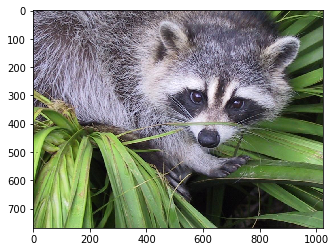

In [3]:
plt.imshow(rgbimage)
plt.show()

##### convert image into gray scale and also plot it or view it

In [4]:
grayimage = skimage.color.rgb2gray(rgbimage)
grayimage.shape

(768, 1024)

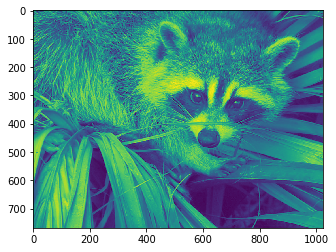

In [5]:
plt.imshow(grayimage)

In [7]:
def fitKMeansAndGenerateCompressedImage(clustSize):
    kmeansObj = KMeans(n_clusters=clustSize)
    kmeansObj.fit(grayimage)
    print("Inertia with this cluster size is {}".format(kmeansObj.inertia_))
    clusters = kmeansObj.cluster_centers_
    labels = kmeansObj.labels_
    print("Cluster shape is {} and label shape is {} during cluster Size {}".format(clusters.shape, labels.shape, clustSize))
    comporessedImage = np.zeros((grayimage.shape[0], grayimage.shape[1]), dtype=np.float)
    for i in range(grayimage.shape[0]):
        for j in range(grayimage.shape[1]):
            comporessedImage[i, j] = clusters[labels[i],j]
            
    plt.imshow(comporessedImage)
    plt.show()

##### 1) This is the image with cluster size 5

Inertia with this cluster size is 17663.744222365473
Cluster shape is (5, 1024) and label shape is (768,) during cluster Size 5


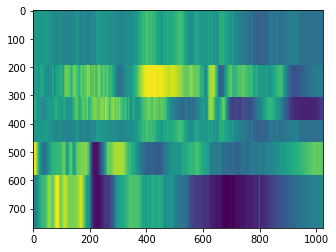

In [8]:
fitKMeansAndGenerateCompressedImage(5)

##### As you can see that, image is hardly recovered after compression

##### 2) This is the image with cluster size 50

Inertia with this cluster size is 5541.083364667607
Cluster shape is (50, 1024) and label shape is (768,) during cluster Size 50


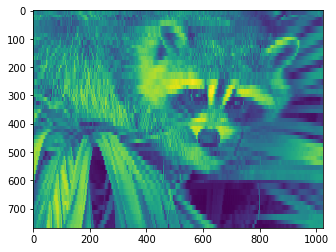

In [9]:
fitKMeansAndGenerateCompressedImage(50)

#### As you can see, image is slightly recovered better with cluster size 50 and image is also compressed 
#### Also you can see inertia reduced from 17000 to 5500 thats why image is clear now or clustering is accurate now